<a href="https://colab.research.google.com/github/gummallaprasanth/California-Housing-Price-Prediction-Using-Machine-learning/blob/main/California_Housing_Price_Prediction_Using_Machine_learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#California Housing Price Prediction Using Machine learning Algorithms

##Importing The Required Libraries For The Project

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
!unzip archive.zip # unzip the Files from the Zip file

Archive:  archive.zip
  inflating: housing.csv             


In [5]:
# load the dataset from csv file to pandas dataframe

df = pd.read_csv('housing.csv')

In [6]:
# printing the first 5 rows of the dataset

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# print the last 5 rows of the dataset

df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [8]:
# checking the shape of the dataset

print(df.shape)

(20640, 10)


We have 20640 rows  and 10 columns in the dataset

In [9]:
# we get full information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
# check the missing values in the dataset

df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [18]:
# use another method for checking null values

dk=[i for i in df.columns if df[i].isna().sum()>0]
dk

['total_bedrooms']

<Axes: >

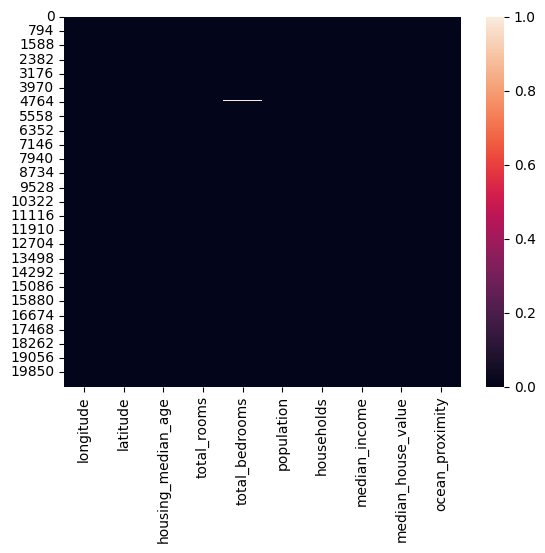

In [20]:
# visualize the null values with seaborn

sns.heatmap(df.isna())

Handling the missing values

In [21]:
# printing the columns names

df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [22]:
# printing the all null values data

df[df['total_bedrooms'].isna()==True]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [23]:
# now we can remove these null values beacuse these will not effect beacuse these are very less number

df.dropna(inplace=True)

In [24]:
# now we can check the data if they had any null values

df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [25]:
# we can print total information also in that we can see the null values

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


so all the null values are removed from the dataset

In [27]:
# print the overall statistics about the data

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Spilt the dataset into dependent and independent

dependent feature : based on the independent feature data we can predict the dependent variable data that is price of the house.

Independent feature : it is defined that these values are not dependent on any values based on these independent features we can predict the house price data

In [28]:
# split the data into dependent and independent feature

x=df.drop(["median_house_value"],axis=1)
y=df['median_house_value']

In [29]:
# checking the dependent and independent labels

print(x.shape)
print(y.shape)

(20433, 9)
(20433,)


In [31]:
# independent feature
x.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [32]:
# dependent feature
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


Spliting the dataset into test and train data

In [33]:
# import the libraries for the splliting from sklearn

from sklearn.model_selection import train_test_split

In [73]:
# spliting the data into train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
# checking the splited data

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_tse.shape)

(16346, 9)
(4087, 9)
(16346,)
(4087,)


In [36]:
x_train.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN


In [37]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,NEAR OCEAN
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,INLAND
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,<1H OCEAN
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,NEAR BAY
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,INLAND


Data Exploration on the train data

In [39]:
# join the both x_train and y_train for data sxploration

# Method 1
# train_data=x_train.join(y_train)

# method 2
train_data=pd.concat([x_train,y_train],axis=1)

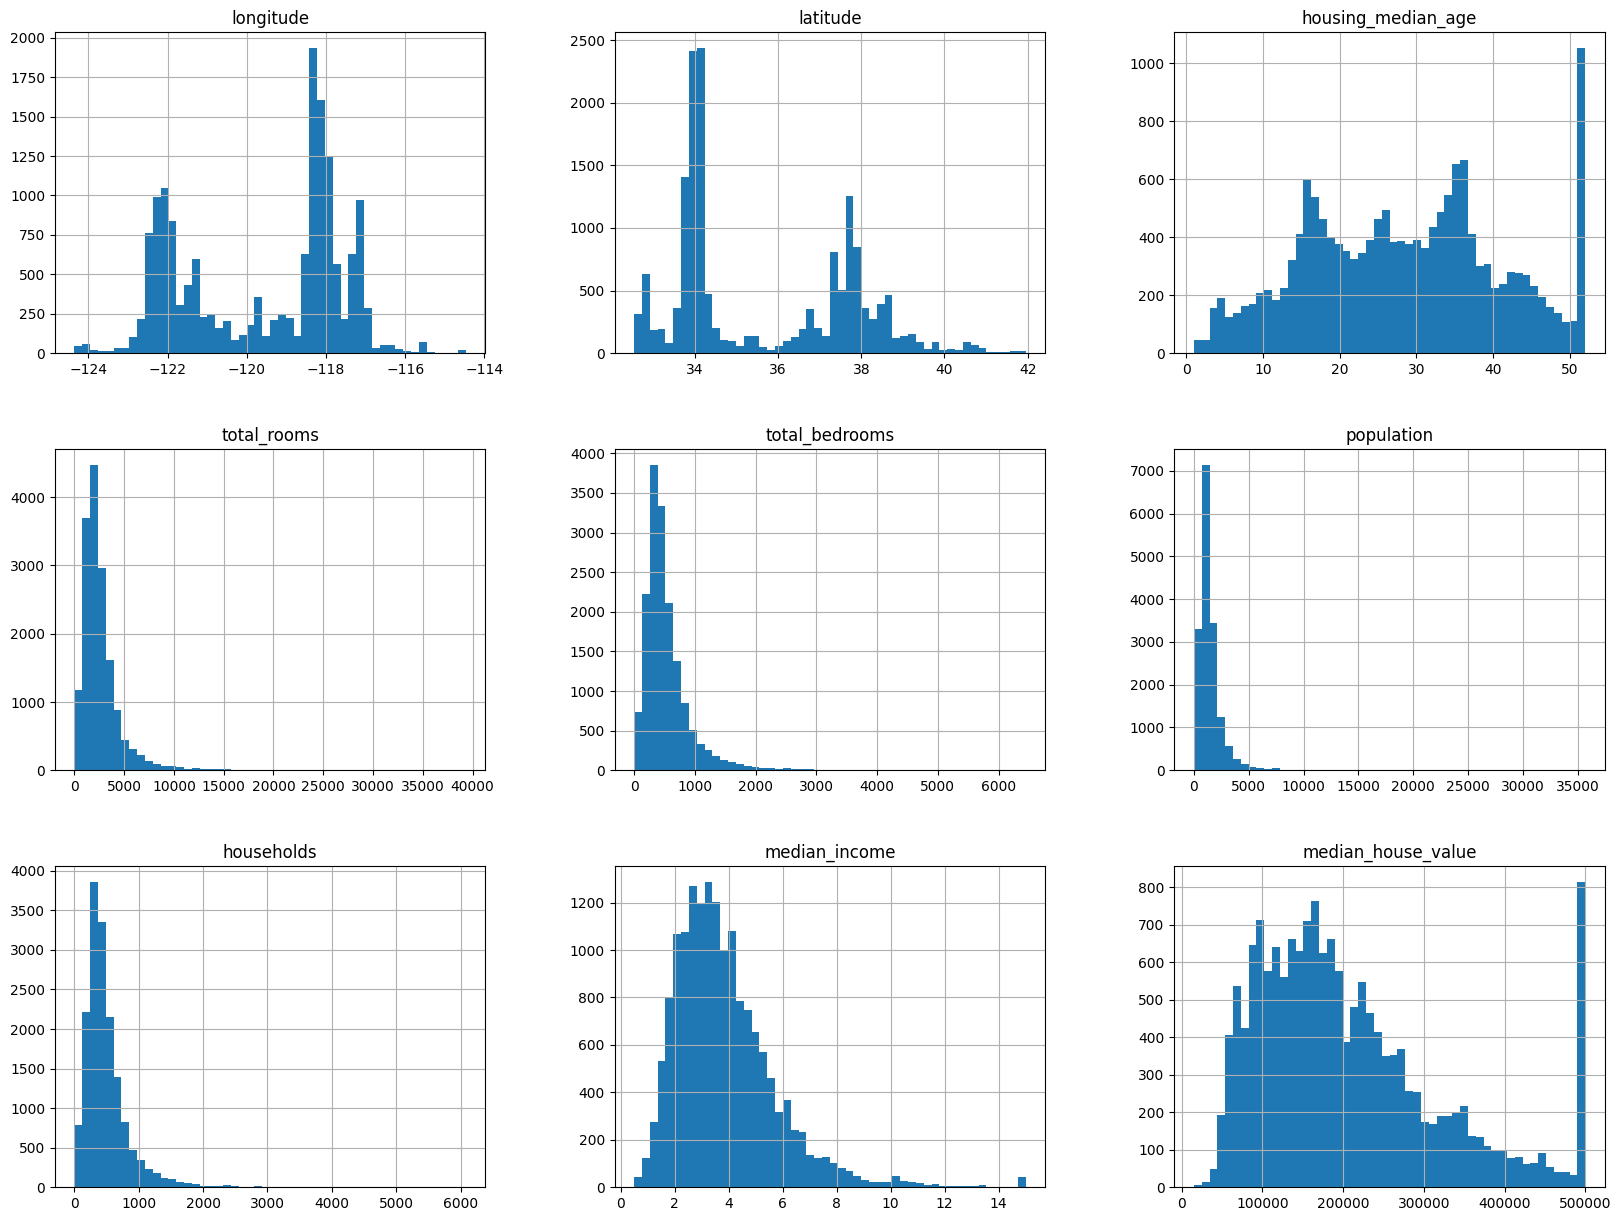

In [41]:
# ploting histograms for the indivisual features

train_data.hist(bins=50,figsize=(20,15))
plt.show()

From the histograms we can find that the data wether is it normally distributed or not and also find the bell curve shape and the data is right skewed or left skewed from the histograms

Obsevation : from the above  data we find that the data of some features look like right skewd means look like log normal distribution . now we can fix that so we need to convert the log normal distribution to normal distribution  usisng log  formula ,that means it will convert the shape of the bell curve into gaussian distribution

features we fopund that right skewed

1.total_rooms

2.total_bedrooms

3.population

4.households

In [49]:
# coverting the log normal distribution to normal or gaussian distribution

train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)



sucessfully converted the data into normal distribution so now we can plot the histograms

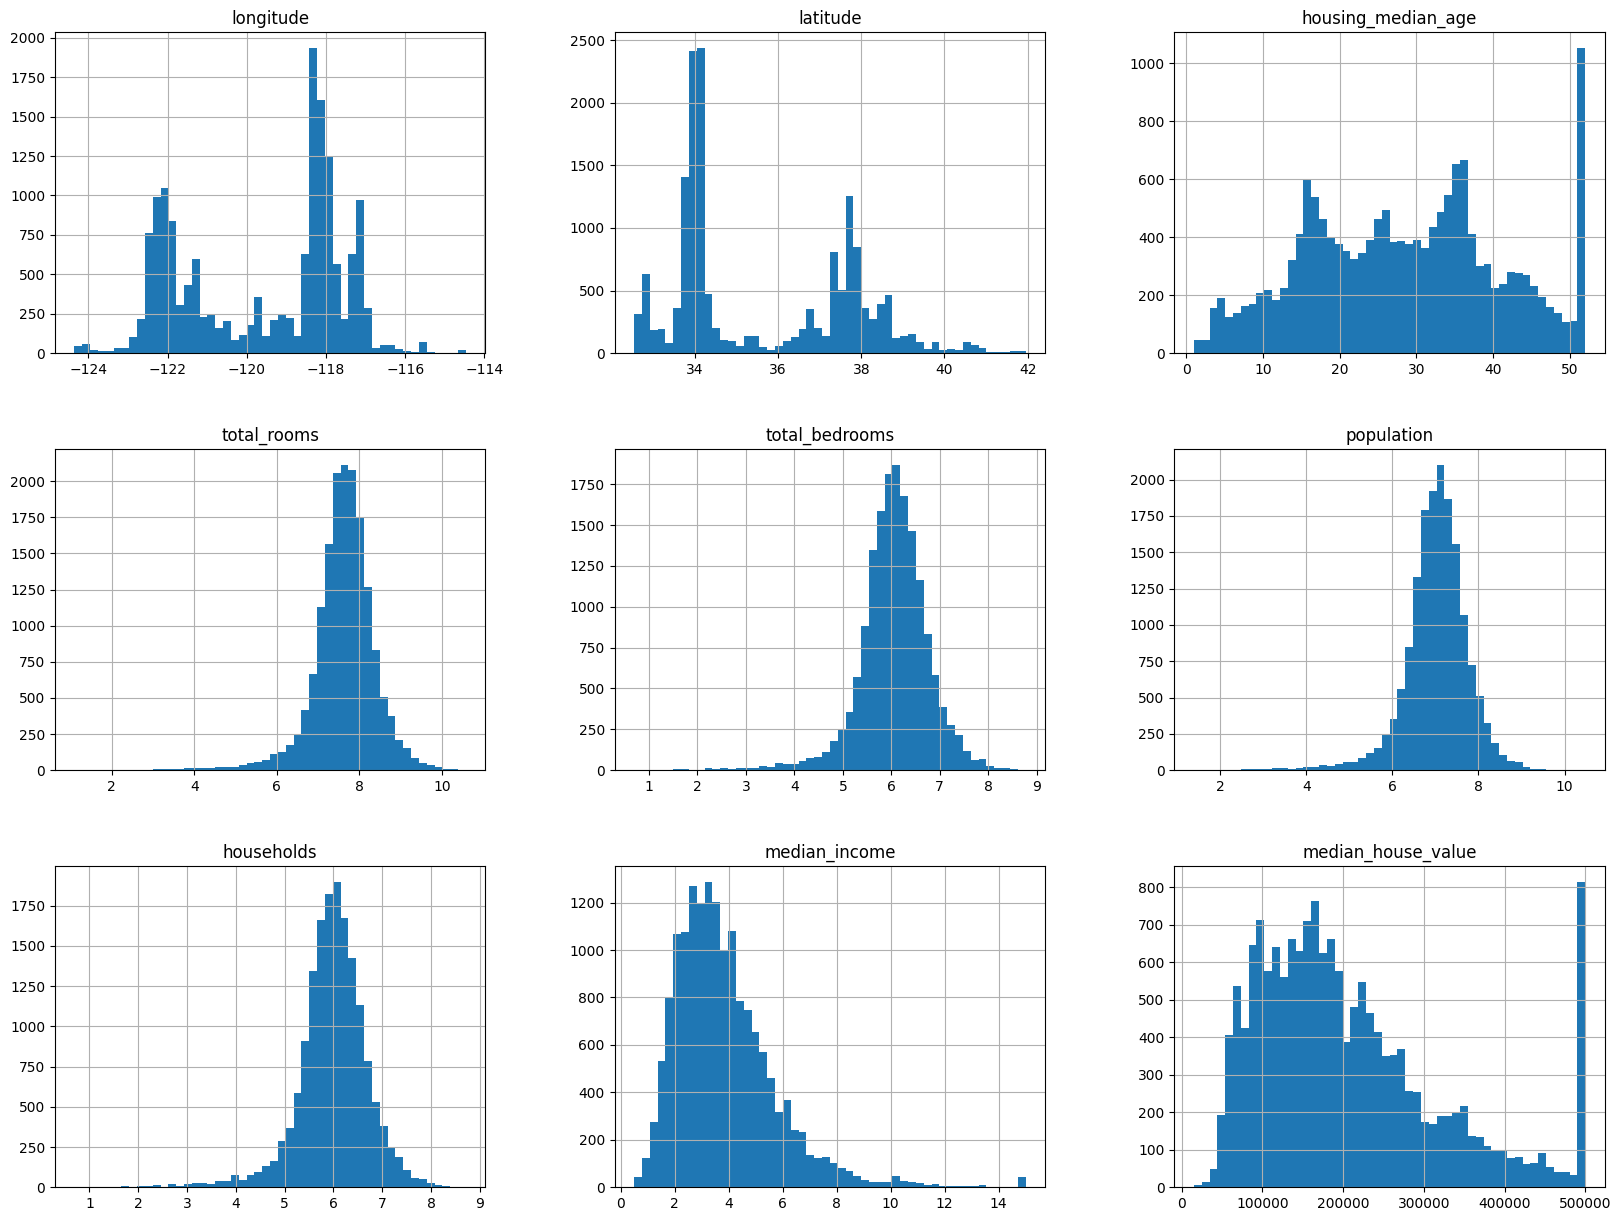

In [50]:
# plot the histograms

train_data.hist(bins=50,figsize=(20,15))
plt.show()

Finding the correlation of the features

In [43]:
# finding the correlation of the features

train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924340,-0.106111,0.040173,0.066871,0.094641,0.054023,-0.021911,-0.048166
latitude,-0.924340,1.000000,0.009535,-0.033439,-0.066337,-0.106192,-0.071678,-0.073213,-0.141933
housing_median_age,-0.106111,0.009535,1.000000,-0.359714,-0.319073,-0.291689,-0.301818,-0.120550,0.104041
total_rooms,0.040173,-0.033439,-0.359714,1.000000,0.929102,0.851704,0.916829,0.202131,0.136040
total_bedrooms,0.066871,-0.066337,-0.319073,0.929102,1.000000,0.872241,0.978582,-0.005364,0.051352
population,0.094641,-0.106192,-0.291689,0.851704,0.872241,1.000000,0.903093,0.007224,-0.023989
households,0.054023,-0.071678,-0.301818,0.916829,0.978582,0.903093,1.000000,0.016608,0.066598
median_income,-0.021911,-0.073213,-0.120550,0.202131,-0.005364,0.007224,0.016608,1.000000,0.688695
median_house_value,-0.048166,-0.141933,0.104041,0.136040,0.051352,-0.023989,0.066598,0.688695,1.000000


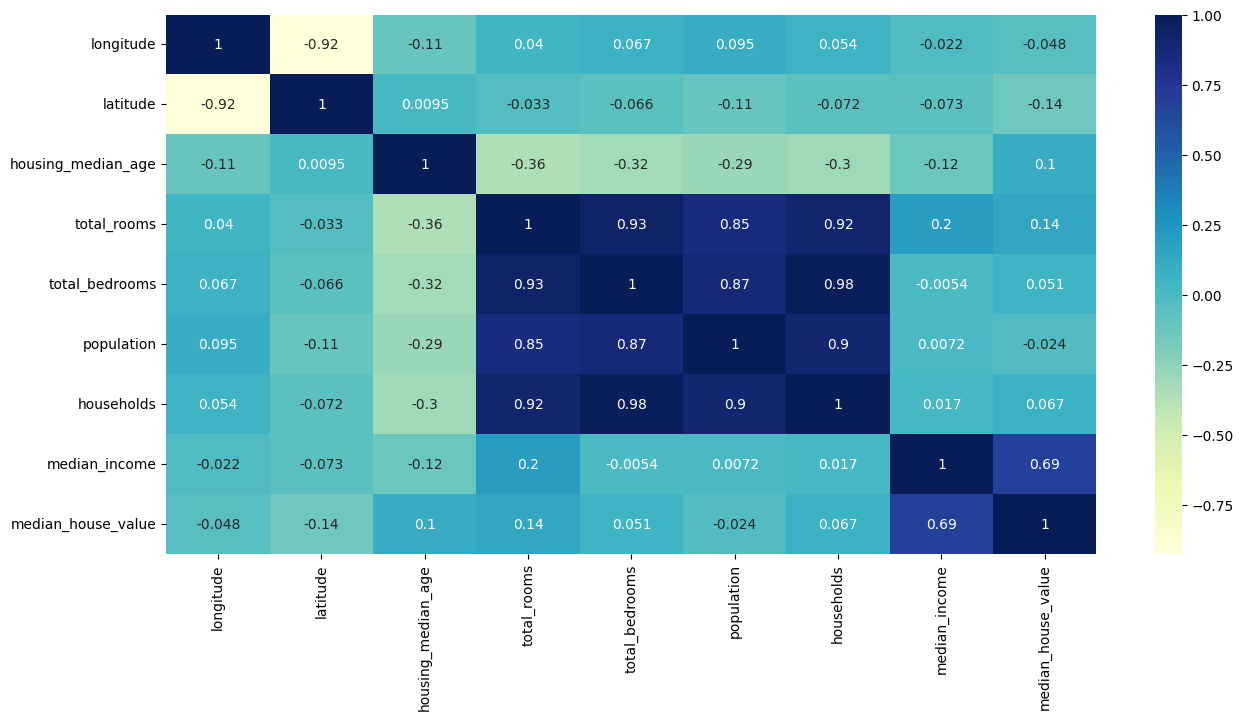

In [48]:
# visualize the correlation using heatmaps from the seaborn
plt.figure(figsize=(15,7))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap='YlGnBu')
plt.show()

**Data** **Preprocessing**

perform one hot encoding using pandas to the ocean_proximity features beacuse it contains the categorical data

In [66]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [58]:
train_data=train_data.join(pd.get_dummies(train_data['ocean_proximity'],dtype=int,drop_first=True)).drop(['ocean_proximity'],axis=1)

In [59]:
# print the train_data
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,0,0,0,0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,1,0,0,0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,1,0,0,0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,0,0,0,0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,0,0,0,1


sucessfully created the one hot encoding for the ocean proximity and removed from the data now in the train dataset all the values in numeric form

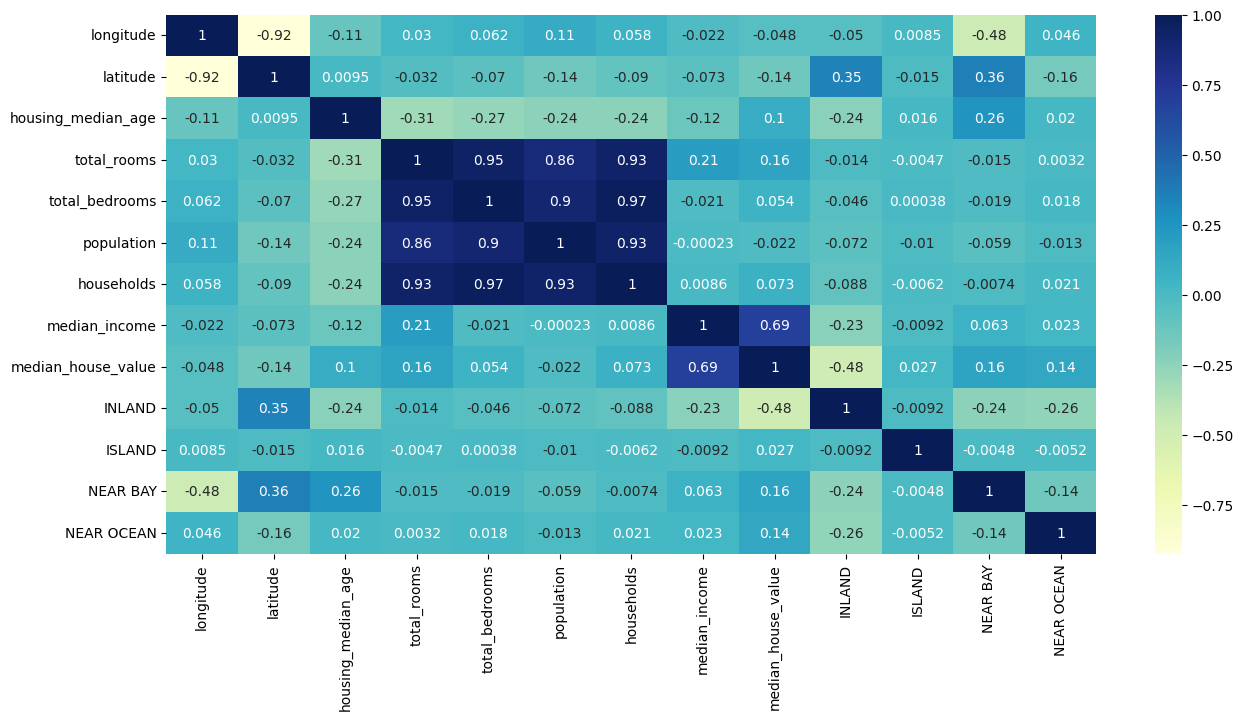

In [60]:
# now again we can check the correlation between the features it will be different from the previous


# visualize the correlation using heatmaps from the seaborn
plt.figure(figsize=(15,7))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap='YlGnBu')
plt.show()

Scatterplot for the longitude and lattitude from the dataset to find the which houses having the highest prices ,if the house is near to the ocean.

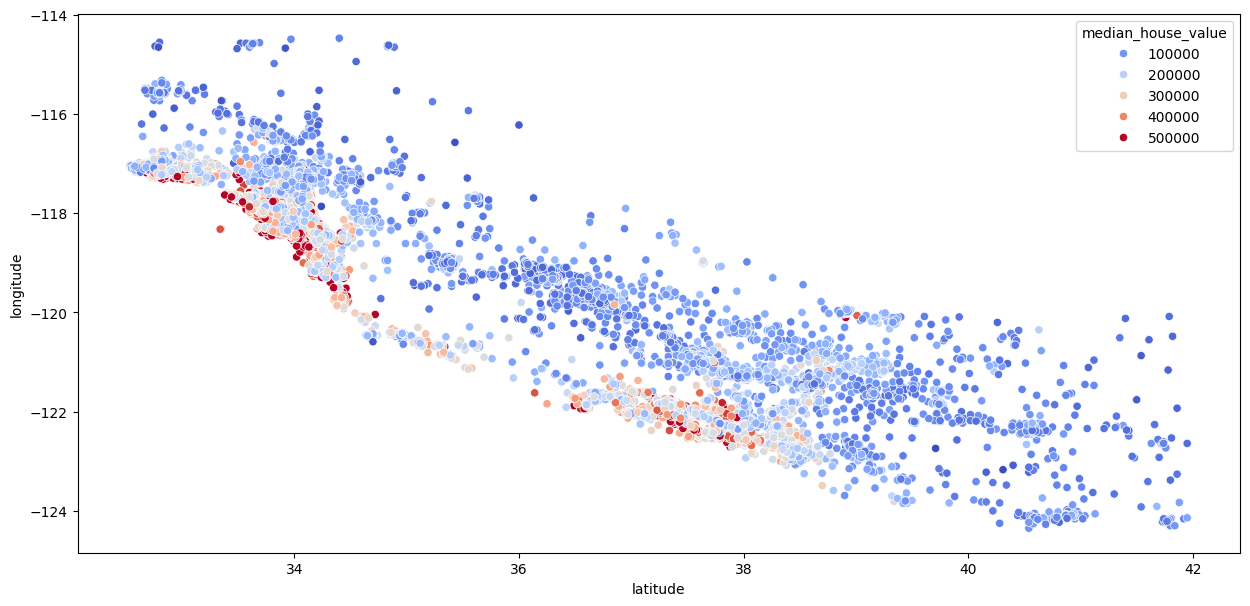

In [64]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='latitude',y='longitude',hue='median_house_value',palette='coolwarm',data=train_data)
plt.show()

observation

red dots : closed to the ocean having high prices compare to other houses

Adding two new features of bedroom_ratio and household_rooms to our train_data to improve ing the accuracy of machine learning model ,as they capture the relationship betwen the number of bedrooms and rooms, and the number of rooms and households.

In [67]:
train_data["bedroom_ratio"]=train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["household_rooms"]=train_data["total_rooms"]/train_data["households"]

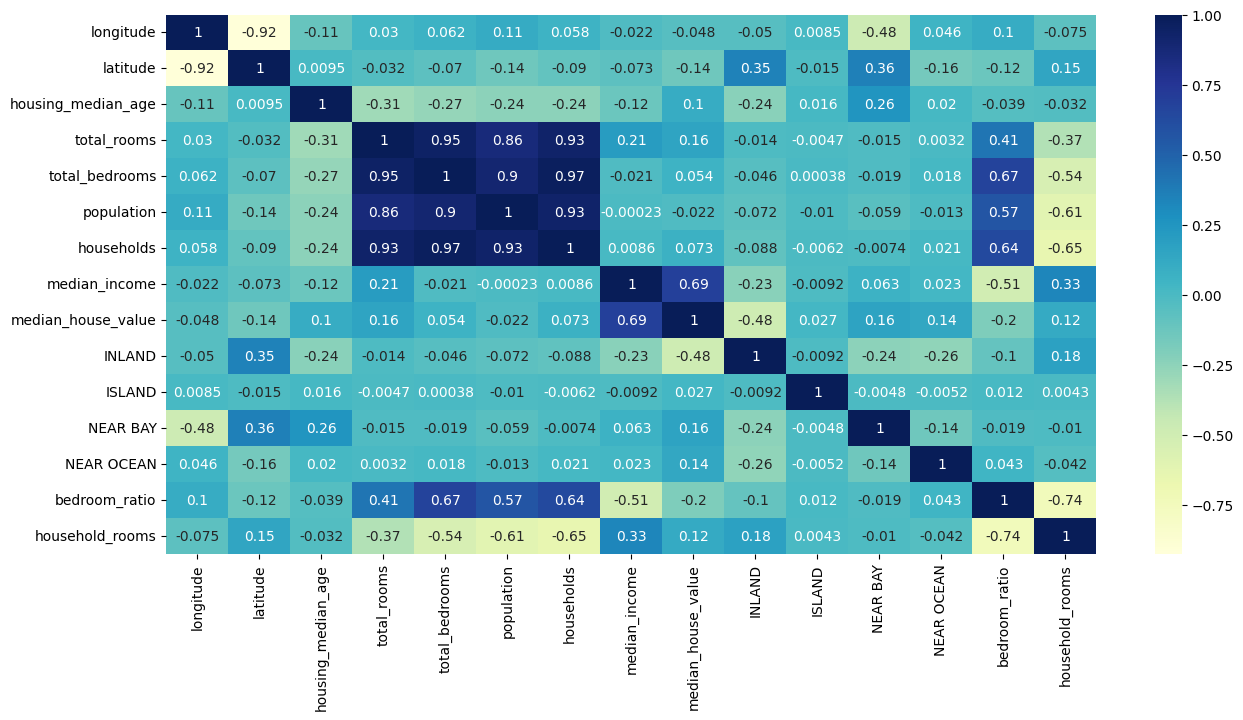

In [68]:
# plot the correlation between the features

plt.figure(figsize=(15,7))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap='YlGnBu')
plt.show()

#Build a simple linear regression model

In [69]:
# Import the model from the sklearn

from sklearn.linear_model import LinearRegression

x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

reg=LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

we need to the same procees for the test,that previously done for the train data

In [74]:
test_data=x_test.join(y_test)


# coverting the log normal distribution to normal or gaussian distribution

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data['ocean_proximity'],dtype=int,drop_first=True)).drop(['ocean_proximity'],axis=1)

test_data["bedroom_ratio"]=test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["household_rooms"]=test_data["total_rooms"]/test_data["households"]



In [75]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']


Evalauate model

In [81]:
# predict the test data on the model

reg.score(x_test,y_test)

0.6687407117584973

In [82]:
# predict the test data on the model

y_pred=reg.predict(x_test)

In [83]:
# check the accuracy score

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.6687407117584973

# Build Random Forest Model

Import the model libraries

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

#  create model

forest=RandomForestRegressor()

# fit the model

forest.fit(x_train,y_train)

RandomForestRegressor()

In [87]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

# predict the test data on the model

y_pred=forest.predict(x_test)

In [88]:
# evaluate the model

r2_score(y_test,y_pred)

0.8201789811074203

observation

compare to the linear regression model random forest model gives best accurcay in the house price predition

## Hyper parameter tuning

In [93]:
# before that we do scaling for both x_train and x_test data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

import dependencies

In [95]:
from ast import Param
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

Param_grid={
    'n_estimators':[10,30,3],
    'max_features':[2,4,6,8],
    'max_depth':[10,12,14,16]
}

forest=RandomForestRegressor()

grid_search=GridSearchCV(estimator=forest,param_grid=Param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(x_train_scaled,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 14, 16],
                         'max_features': [2, 4, 6, 8],
                         'n_estimators': [10, 30, 3]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [96]:
print(grid_search.best_params_)

{'max_depth': 16, 'max_features': 8, 'n_estimators': 30}


In [100]:
# print the best fit score

print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=16, max_features=8, n_estimators=30)


In [99]:
# find the best estimator score for the test data

grid_search.best_estimator_.score(x_test_scaled,y_test)

0.8142983926956366